**MATH 317 - Lab Assignment 3** <br>
**Due: Thursday, November 9, 2023** <br>
**Skylar Bitar (261050625)**

1. Implement Lagrange interpolation. Note that your code will not consist of a single function to compute $L_nf(x)$, because you need to preprocess the data $f, x_0, . . . , x_n$, so that the computation of $L_nf(x)$ would benefit from the result. Showcase your code by several interesting examples, by plotting the graphs of $f$ and $L_nf$.

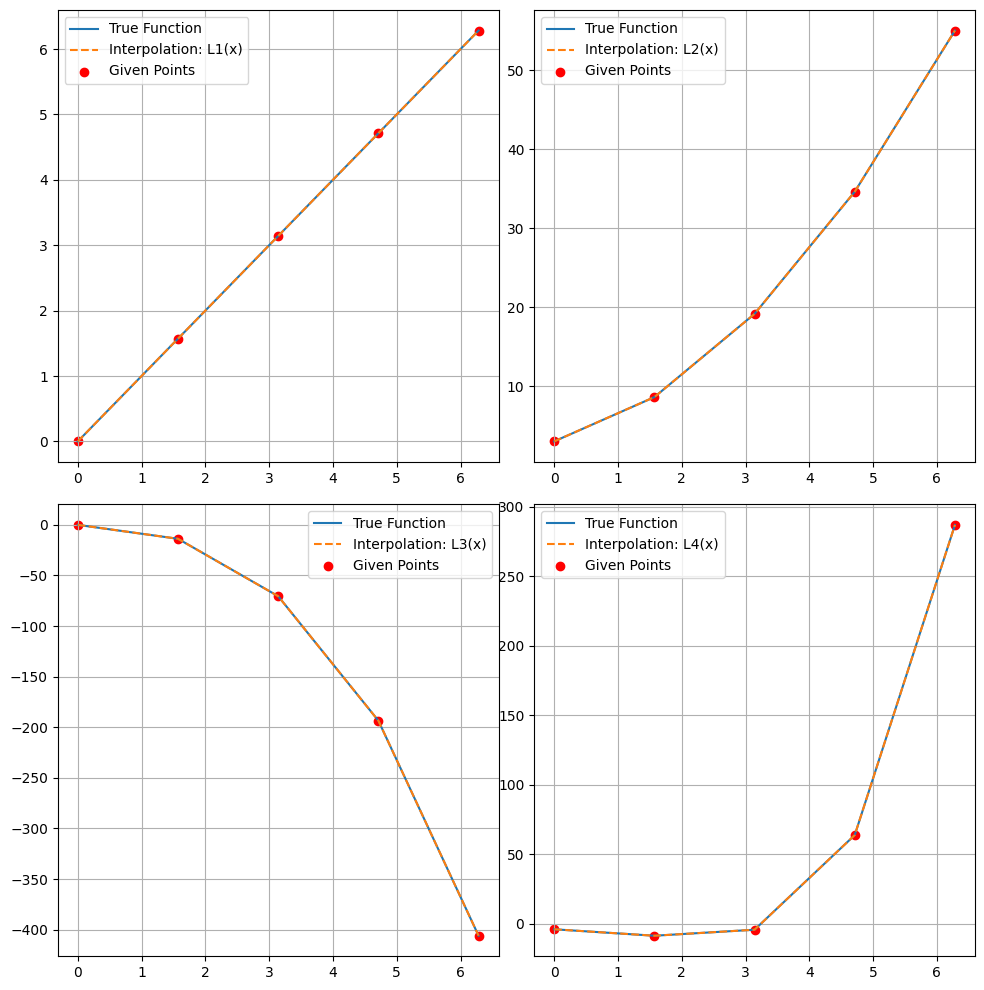

In [1]:
import math

def Lagrange(function, nodes):  
    fNodes = [function(node) for node in nodes] # Apply function to all nodes (preprocess)
    
    def compute(xk, x):
        Lk = 1 # Initialize result
        for i, xi in enumerate(nodes): # Iterate through the nodes
            if i != xk:
                Lk *= (x - xi) / (nodes[xk] - xi) # Find the the associated L_k values
        return Lk
    
    def L(x):
        return sum(fNodes[xk] * compute(xk, x) for xk in range(len(fNodes))) # Multiply the f(x)by each L_n (formula)

    return L

# Examples
import numpy as np
import matplotlib.pyplot as plt

def f1(x):
    return x # Linear

def f2(x):
    return x**2 + 2*x + 3 # Polynomial, Order 2

def f3(x):
    return -x**3 - 4*x**2 # Polynomial, Order 3

def f4(x):
    return (1/4)*x**4 - (5/2)*x**2 - 4 # Polynomial, Order 4

xValues = [0, math.pi/2, math.pi, 3*math.pi/2, 2*math.pi] # Test Values
L1 = Lagrange(f1, xValues) # We calculate the Lagrange polynomial for each testcase
L2 = Lagrange(f2, xValues)
L3 = Lagrange(f3, xValues)
L4 = Lagrange(f4, xValues)

yTrue1 = [f1(xi) for xi in xValues] # Find the true points 
yInterpolated1 = [L1(xi) for xi in xValues] # And the interpolated points to compare

yTrue2 = [f2(xi) for xi in xValues]
yInterpolated2 = [L2(xi) for xi in xValues]

yTrue3 = [f3(xi) for xi in xValues]
yInterpolated3 = [L3(xi) for xi in xValues]

yTrue4 = [f4(xi) for xi in xValues]
yInterpolated4 = [L4(xi) for xi in xValues]

plt.figure(figsize=(14, 10)) # We will create subplots to easily show all 4 result

# For f1
plt.subplot(2, 2, 1) 
plt.plot(xValues, yTrue1, label="True Function") # We plot the true functions against the interpolation
plt.plot(xValues, yInterpolated1, linestyle="--", label="Interpolation: L1(x)")
plt.scatter(xValues, [f1(xi) for xi in xValues], color="red", label="Given Points") # And highlight the points we used
plt.grid(True)
plt.legend(loc='upper left') # And repeat the same for all 4 testcases

# For f2
plt.subplot(2, 2, 2)
plt.plot(xValues, yTrue2, label="True Function")
plt.plot(xValues, yInterpolated2, linestyle="--", label="Interpolation: L2(x)")
plt.scatter(xValues, [f2(xi) for xi in xValues], color="red", label="Given Points")
plt.grid(True)
plt.legend(loc='upper left')

# For f3
plt.subplot(2, 2, 3)
plt.plot(xValues, yTrue3, label="True Function")
plt.plot(xValues, yInterpolated3, linestyle="--", label="Interpolation: L3(x)")
plt.scatter(xValues, [f3(xi) for xi in xValues], color="red", label="Given Points")
plt.grid(True)
plt.legend(loc='upper right')

# For f4
plt.subplot(2, 2, 4)
plt.plot(xValues, yTrue4, label="True Function")
plt.plot(xValues, yInterpolated4, linestyle="--", label="Interpolation: L4(x)")
plt.scatter(xValues, [f4(xi) for xi in xValues], color="red", label="Given Points")
plt.grid(True)
plt.legend(loc='upper left')

plt.tight_layout()
plt.subplots_adjust(right=0.7)
plt.show()

2. Write a code to compute the maximum error of $L_nf$ in the interval [a, b]. This does not need to be very precise. For example, you could evaluate $f$ and $L_nf$ at 1000 equally spaced points in [a, b], to approximate the maximum error. Test it on a couple of well chosen examples.

In [2]:
def LagrangeError(f, L, a, b):
    f_vals = [f(x) for x in np.linspace(a, b, 1000)] # Applies the actual function to equispaced nodes
    L_vals = [L(x) for x in np.linspace(a, b, 1000)] # And finds interpolation to equispaced nodes
    
    errors = [abs(f - L) for f, L in zip(f_vals, L_vals)] # Find the error between the two (for all)
    return max(errors)

# Using some of the same examples from above
print("Error (y = x): ", LagrangeError(f1, L1, 0, 5)) # We use the 
print("Error (y = x^2 + 2x + 3): ", LagrangeError(f2, L2, 0, 5))
print("Error (y = x^3 - 4x^2): ", LagrangeError(f3, L3, 0, 5))
print("Error (y = x^4 + x^3 - 2): ", LagrangeError(f4, L4, 0, 5))

Error (y = x):  2.6645352591003757e-15
Error (y = x^2 + 2x + 3):  2.1316282072803006e-14
Error (y = x^3 - 4x^2):  8.526512829121202e-14
Error (y = x^4 + x^3 - 2):  4.263256414560601e-14


3. Choose some “nice” function $f$, such as $sinx$ or $exp(cosx)$, and apply Lagrange interpolation with equally spaced nodes in the interval [a, b]. The endpoints of the interval should be included in the nodes, that is, we have $x_0$ = a and $x_n$ = b. Plot the graph of the logarithm of the maximum error against the polynomial degree n. Comment on the result.

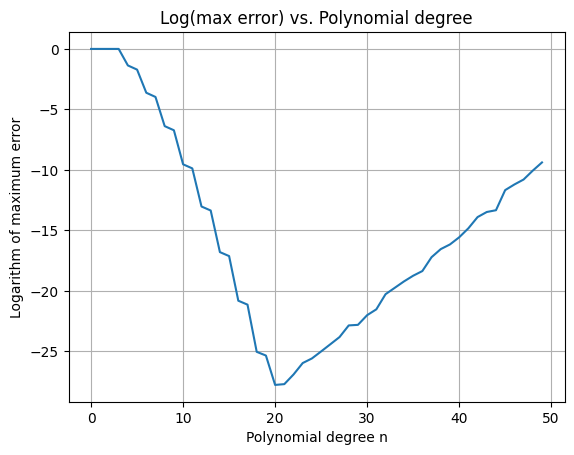

In [4]:
def plotError(f, a, b, upperLimit):
    degrees = list(range(0, upperLimit)) # Determines all the polynomial degrees n to test
    errors = []
    
    for n in degrees: # We calcualte the error for each polynomial up to n starting from 0. Append to list
        errors.append(math.log(LagrangeError(f, Lagrange(f, np.linspace(a, b, n)), a, b)))

    plt.plot(degrees, errors) # Plot the errors vs the degrees given
    plt.xlabel('Polynomial degree n')
    plt.ylabel('Logarithm of maximum error')
    plt.title('Log(max error) vs. Polynomial degree')
    plt.grid(True)
    plt.show()

plotError(math.sin, 0, 2*math.pi, 50) # Example of nice example (i.e. sinx)

**Commentary:** We see that the logarithm of the maximum error initially decreases reaches a minimum for polynomial with degree ~15. However, afterwards, it increases forever. This can be explained by the Runge Phenomenon, which is a problem that occurs in oscillatory functions at higher degree polynomials using equally spaced nodes. This is well known to occur in sinx (which is an oscillatory function), so we should expect this to happen. See Table 6.1 in the textbook for another example.

4. It is well known that Lagrange interpolation with equally spaced nodes is susceptible to the Runge phenomenon. You are asked to do some reading to familiarize yourself with this phenomenon. Pick a function $f$, and illustrate the Runge phenomenon by the graphs of $L_nf$. As in the previous question, plot also the graph of the logarithm of the maximum error against the polynomial degree n. Comment on the result.

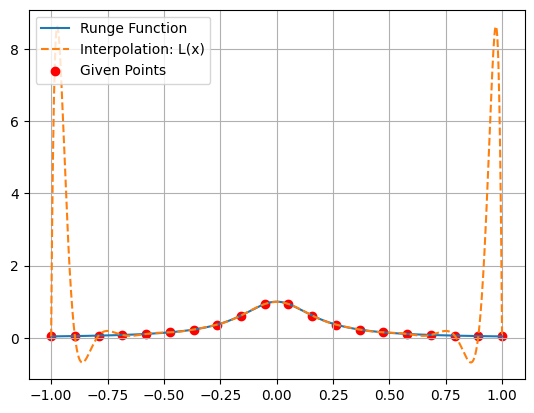

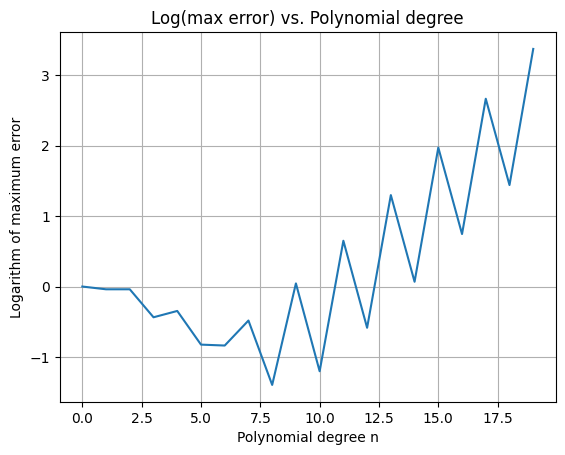

In [5]:
def func(x):
    return 1.0 / (1 + 25 * x**2) # Runge Function to highlight effect

xValues = np.linspace(-1, 1, 20) # Runge function is best seen between [-1, 1]

L = Lagrange(func, xValues) # Find the lagrange interpolation

x = np.linspace(min(xValues), max(xValues), 1000)
yT = [func(xi) for xi in x] # Find the true values for comparison
yI = [L(xi) for xi in x] # Plug in values of x into Interpolation
 
plt.plot(x, yT, label="Runge Function") # Plot in the same way we did in the first question
plt.plot(x, yI, linestyle="--", label="Interpolation: L(x)")
plt.scatter(xValues, [func(xi) for xi in xValues], color="red", label="Given Points")
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

plotError(func, -1, 1, 20) # And we also want to see what the error of that looks like so use fn from before

**Commentary:** Here we see a much clearer example of the Runge Phenomenon (compared to part c). We used the function f(x) = $\frac{1}{1 + 25x^2}$ (known as the Runge function). In the first graph, we have the interpolation overlayed with the original function. Notice that we have substantial error at the boundaries of [a, b]. This is the typical behaviour of the Runge Phenomenon. Likewise, we see in the second graph, that the error initially decreases for the first couple polynomials of small degree, however the error then trends upwards infinintely as the polynomial degree increases. This is inline with Table 6.1 in the textbook that elaborates on the behaviour of the Runge Phenomenon.

5. Now perform Lagrange interpolation with Chebyshev nodes on the same example, in order to see how Chebyshev nodes compare to equally spaced nodes. Plot the graphs of $L_nf$, and also plot the graph of the logarithm of the maximum error against the polynomial degree n. Comment on the result.

**Commentary:** Unlike the outcome in part 4, we see a much different picture here. Despite measuring up to the same $n^{th}$ polynomial, notice that in the first graph, we no longer have any peculiar boundary effects and our interpolation is fairly close to the behaviour of the actual Runge function. This is a clear indication that we are no longer dealing with the Runge phenomenon. Likewise, in the second graph, the error trends in a decreasing fashion with no rebound upwards (like we see above). Thus, as the polynomial degree increases (i.e. we use more points), our interpolation becomes more accurate.

6. Implement piecewise linear interpolation with equally spaced nodes in [a, b]. Showcase your code by several interesting examples.

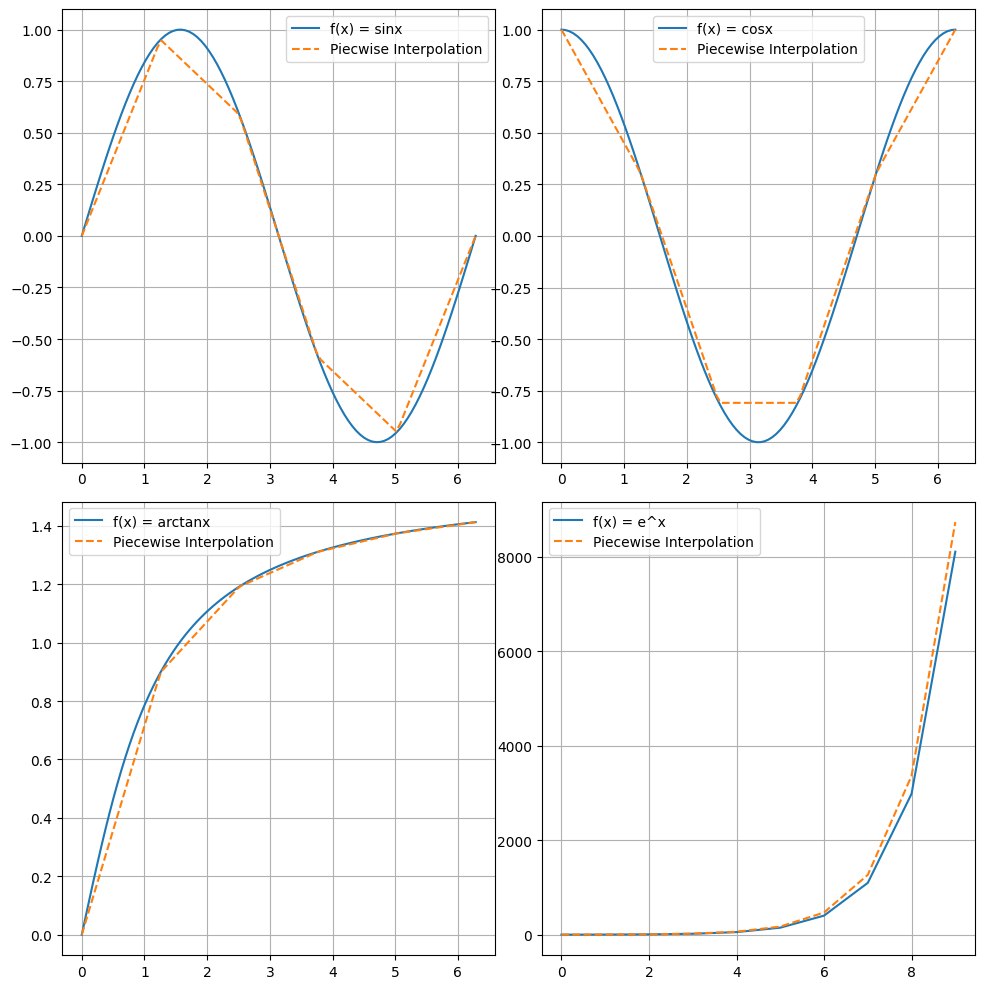

In [87]:
def piecewiseLInterpolation(func, a, b, spacing):
    nodes = np.linspace(a, b, spacing) # Find equispaced nodes for [a,b]
    interpolations = []

    for i in range(len(nodes) - 1):
        # Iterate through each pair of nodes, starting from the beginning.
        xi = nodes[i]
        xj = nodes[i + 1]

        def interpolation(x, xi=xi, xj=xj): 
            # Using piecewise linear interpolation formula seen in Lecture 14
            return func(xi) * ((x - xj) / (xi - xj)) + func(xj) * ((x - xi) / (xj - xi))

        interpolations.append(interpolation) # Append the interpolation for the pair of nodes.

    return interpolations

def evaluateLPiecewise(x, funcs, nodes): 
    # Evaluates the linear interpolation with given values
    for i in range(len(nodes) - 1): 
        # Applies the nodes to the interpolation. See below
        if x <= nodes[i+1]: 
            return funcs[i](x)
    return funcs[-1](x)

xV1 = np.linspace(0, 2*math.pi, 100) # We will have 2 different sets of values to test (for trig)
xV2 = np.linspace(0, 9, 10) # As this one works better for e^x.

P1 = piecewiseLInterpolation(math.sin, 0, 2*math.pi, 6) # Find piecewise interpolation values for 4 test cases
P2 = piecewiseLInterpolation(math.cos, 0, 2*math.pi, 6)
P3 = piecewiseLInterpolation(math.atan, 0, 2*math.pi, 6)
P4 = piecewiseLInterpolation(math.exp, 0, 10, 10)

nodes1 = np.linspace(0, 2*math.pi, 6) # Different nodes to test (this for trig)
nodes2 = np.linspace(0, 9, 10) # This for e^x.

yI1 = [evaluateLPiecewise(xi, P1, nodes1) for xi in xV1] # We evaluate the given interpolation for each test case
yI2 = [evaluateLPiecewise(xi, P2, nodes1) for xi in xV1] # for each value in the test values xV1 or xV2
yI3 = [evaluateLPiecewise(xi, P3, nodes1) for xi in xV1]
yI4 = [evaluateLPiecewise(xi, P4, nodes2) for xi in xV2]

yT1 = [math.sin(xi) for xi in xV1] # Here we find the true values for each of the 4 test cases for comparison 
yT2 = [math.cos(xi) for xi in xV1]
yT3 = [math.atan(xi) for xi in xV1]
yT4 = [math.exp(xi) for xi in xV2]

plt.figure(figsize=(14, 10)) # We will have 4 subplots, to once again easily compare the 4 test cases' interpolation
# to their true form

# For f1
plt.subplot(2, 2, 1)
plt.plot(xV1, yT1, label="f(x) = sinx")
plt.plot(xV1, yI1, linestyle="--", label="Piecwise Interpolation")
plt.grid(True)
plt.legend(loc='upper right')

# For f2
plt.subplot(2, 2, 2)
plt.plot(xV1, yT2, label="f(x) = cosx")
plt.plot(xV1, yI2, linestyle="--", label="Piecewise Interpolation")
plt.grid(True)
plt.legend(loc='upper center')

# For f3
plt.subplot(2, 2, 3)
plt.plot(xV1, yT3, label="f(x) = arctanx")
plt.plot(xV1, yI3, linestyle="--", label="Piecewise Interpolation")
plt.grid(True)
plt.legend(loc='upper left')

# For f4
plt.subplot(2, 2, 4)
plt.plot(xV2, yT4, label="f(x) = e^x")
plt.plot(xV2, yI4, linestyle="--", label="Piecewise Interpolation")
plt.grid(True)
plt.legend(loc='upper left')

plt.tight_layout()
plt.subplots_adjust(right=0.7)
plt.show()

7. Implement piecewise quadratic interpolation with equally spaced nodes in [a, b]. Showcase your code by several interesting examples.

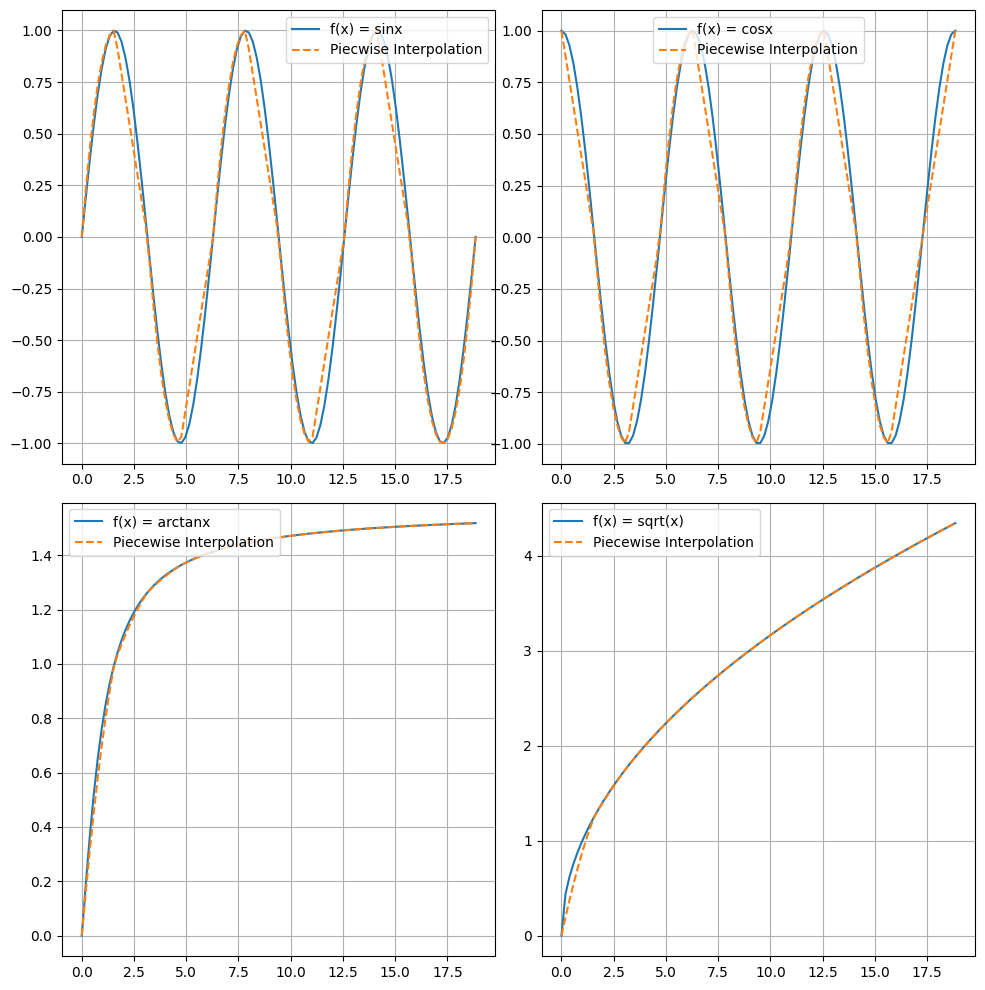

In [8]:
def piecewiseQInterpolation(func, a, b, spacing):
    nodes = np.linspace(a, b, spacing) # Determines equispaced nodes in [a,b]
    interpolations = []

    for i in range(len(nodes) - 2):
        # We iterate through each trio of nodes between [a,b]
        x0 = nodes[i]
        x1 = nodes[i + 1]
        x2 = nodes[i + 2]

        def interpolation(x, x0=x0, x1=x1, x2=x2):
            # Using formula seen in class, Lecture 14
            return (func(x0)*(((x-x1)*(x-x2))/((x0-x1)*(x0-x2))) 
            + func(x1)*(((x-x0)*(x-x2))/((x1-x0)*(x1-x2))) 
            + func(x2)*(((x-x0)*(x-x1))/((x2-x0)*(x2-x1))))

        interpolations.append(interpolation)

    return interpolations

def evaluateQPiecewise(x, funcs, nodes):
    # Similar to evaluateLPiecewise From above, but we need to consider that we go in threes instead of twos
    for i in range(len(nodes) - 2): # So shorten iteration by 1
        if x <= nodes[i+1]:
            return funcs[i](x)
    if x <= nodes[-1]:
        return funcs[-1](x)

xV = np.linspace(0, 6*math.pi, 100) # All test cases can work decently with this so only one set of Values
nodes = np.linspace(0, 6*math.pi, 13) # Equispaced nodes, steps of pi/2 as these will be a good choice 
# against the curves

P1 = piecewiseQInterpolation(math.sin, 0, 6*math.pi, 13) # Find the piecewise Q interpolation for the 4 chosen test cases
P2 = piecewiseQInterpolation(math.cos, 0, 6*math.pi, 13)
P3 = piecewiseQInterpolation(math.atan, 0, 6*math.pi, 13)
P4 = piecewiseQInterpolation(math.sqrt, 0, 6*math.pi, 13)

yI1 = [evaluateQPiecewise(xi, P1, nodes) for xi in xV] # Evaluate the 4 Test cases using each value in the set of test values
yI2 = [evaluateQPiecewise(xi, P2, nodes) for xi in xV]
yI3 = [evaluateQPiecewise(xi, P3, nodes) for xi in xV]
yI4 = [evaluateQPiecewise(xi, P4, nodes) for xi in xV]

yT1 = [math.sin(xi) for xi in xV] # And determine what the true curve should be for each test case
yT2 = [math.cos(xi) for xi in xV]
yT3 = [math.atan(xi) for xi in xV]
yT4 = [math.sqrt(xi) for xi in xV]

plt.figure(figsize=(14, 10)) # Once again we make 4 subplots to easily show all interpolations against the true.

# For f1
plt.subplot(2, 2, 1)
plt.plot(xV, yT1, label="f(x) = sinx")
plt.plot(xV, yI1, linestyle="--", label="Piecwise Interpolation")
plt.grid(True)
plt.legend(loc='upper right')

# For f2
plt.subplot(2, 2, 2)
plt.plot(xV, yT2, label="f(x) = cosx")
plt.plot(xV, yI2, linestyle="--", label="Piecewise Interpolation")
plt.grid(True)
plt.legend(loc='upper center')

# For f3
plt.subplot(2, 2, 3)
plt.plot(xV, yT3, label="f(x) = arctanx")
plt.plot(xV, yI3, linestyle="--", label="Piecewise Interpolation")
plt.grid(True)
plt.legend(loc='upper left')

# For f4
plt.subplot(2, 2, 4)
plt.plot(xV, yT4, label="f(x) = sqrt(x)")
plt.plot(xV, yI4, linestyle="--", label="Piecewise Interpolation")
plt.grid(True)
plt.legend(loc='upper left')

plt.tight_layout()
plt.subplots_adjust(right=0.7)
plt.show()

8. Take the function f from Question 3, and compare the errors of its piecewise linear and piecewise quadratic interpolations. Do this by graphing the logarithm of the maximum errors. Repeat the experiment for the function f from Question 4. Comment on the result.

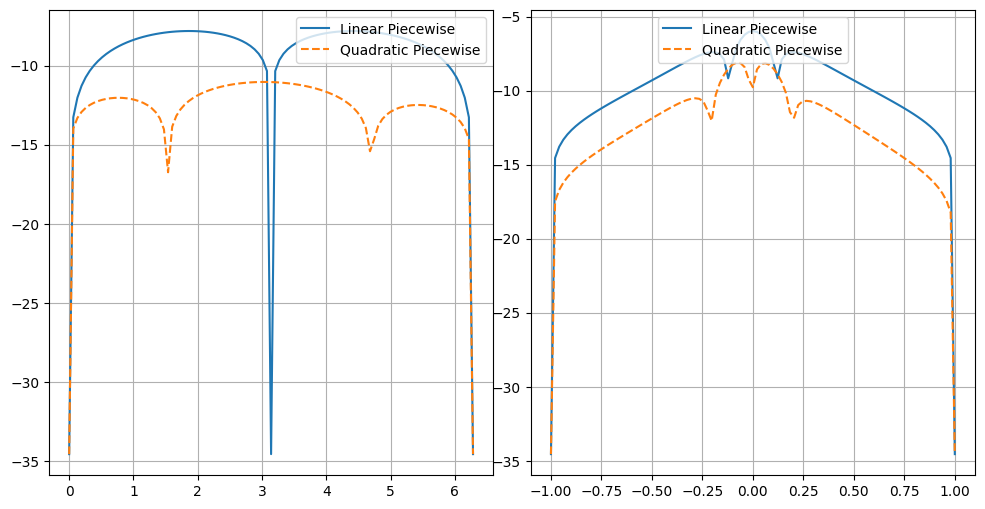

In [88]:
def maxErrorPiecewise(true_func, interp_func, nodes, x_values):
    max_errors = []
    for i in range(len(nodes)-1):
        # Determine all x values between given two nodes
        x_interval = [x for x in x_values if nodes[i] <= x <= nodes[i+1]]
        true_values = [true_func(x) for x in x_interval] # Determine the true values in the x interval
        interp_values = [interp_func(x) for x in x_interval] # Determine the interpolated values in the x interval
        error = np.max(np.abs(np.array(true_values) - np.array(interp_values))) # Find maximum error across both
        if error < 10e-16: error = 10e-16  # Could be very small (i.e. ~0) so truncate in case (log0=undefined)
        max_errors.append(np.log(error)) # Append each error to the list to plot later
    return max_errors

nodes1 = np.linspace(0, 2*math.pi, 100) # Deterrmine equispaced nodes
funcL = piecewiseLInterpolation(math.sin, 0, 2*math.pi, 100) # Determine Linear and Quadratic Interpolation
funcQ = piecewiseQInterpolation(math.sin, 0, 2*math.pi, 100) # for the test case (math.sin = f from Q3)

xValues = np.linspace(0, 2*math.pi, 99) # Associated x values

# Find the error for each of them. We put it in lambda form to preserve it as a polynomial when passing it as arg.
errorf3Linear = maxErrorPiecewise(math.sin, lambda x: evaluateLPiecewise(x, funcL, nodes1), nodes1, xValues)
errorf3Quadratic = maxErrorPiecewise(math.sin, lambda x: evaluateQPiecewise(x, funcQ, nodes1), nodes1, xValues)

nodes2 = np.linspace(-1, 1, 100) # Now, we find node and both forms of interpolation for f in Q4 (i.e. Runge function)
func2L = piecewiseLInterpolation(func, -1, 1, 100)
func2Q = piecewiseQInterpolation(func, -1, 1, 100)

xVal = np.linspace(-1, 1, 99) # Associated x values

# Find the error for each of them. We put it in lambda form to preserve it as a polynomial when passing it as arg.
errorf4Linear = maxErrorPiecewise(func, lambda x: evaluateLPiecewise(x, func2L, nodes2), nodes2, xVal)
errorf4Quadratic = maxErrorPiecewise(func, lambda x: evaluateQPiecewise(x, func2Q, nodes2), nodes2, xVal)

# Plot both examples side by side (need subplots for this)
plt.figure(figsize=(14, 10)) 
# For f1
plt.subplot(2, 2, 1)
plt.plot(xValues, errorf3Linear, label="Linear Piecewise")
plt.plot(xValues, errorf3Quadratic, linestyle="--", label="Quadratic Piecewise")
plt.grid(True)
plt.legend(loc='upper right')

# For f2
plt.subplot(2, 2, 2)
plt.plot(xVal, errorf4Linear, label="Linear Piecewise")
plt.plot(xVal, errorf4Quadratic, linestyle="--", label="Quadratic Piecewise")
plt.grid(True)
plt.legend(loc='upper center')

plt.tight_layout()
plt.subplots_adjust(right=0.7)
plt.show()

**Commentary**: Above are the two graphs showing the logarithm of the max error for the the piecewise linear and quadratic interpolations of the functions from Q3 and Q4. In the first graph (i.e. for f(x) = sinx), we see that the quadratic piecewise function generally has lower maximum error, except in the center where the linear piecewise fairs better. This occurs because, whereas elsewhere we have curves (and thus quadratic interpolation would fair better in these scenarios), at ~$\pi$ we have a linear downwards slope (see Q3 plot 1 for visualization), thus linear interpolation becomes a more accurate representation the closer to we get to this point. In the second graph, we have a similar (albeit less extreme) situation as the first. The quadratic interpolation is generally a superior choice, except just before the reaching the peak. To understand why, refer to Q4+Q5 and notice that the slope becomes slightly more linear just before reaching the peak. That said, the difference between the two at those points are minimal. Therefore, it is clear that we generally prefer piecewise quadratic interpolation the more curvature we can expect to see when graphing a function, and prefer piecewise linear interpolation otherwise. It is also important to note that the choice of nodes will affect the outcome. If our nodes are chosen such that they are along a curve, piecewise quadratic interpolation will yield better results.